Khởi tạo dữ liệu (sau đó vẽ ra để hình dung dữ liệu)

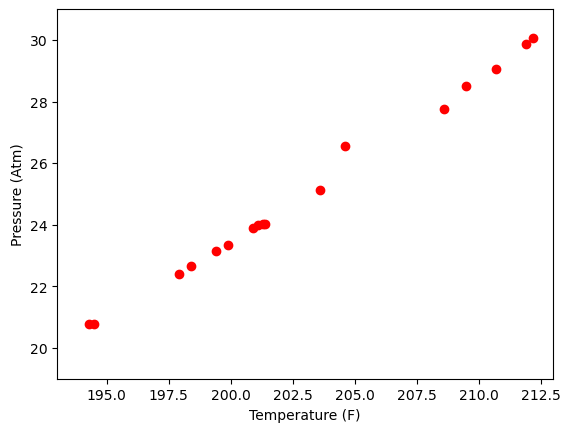

In [10]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


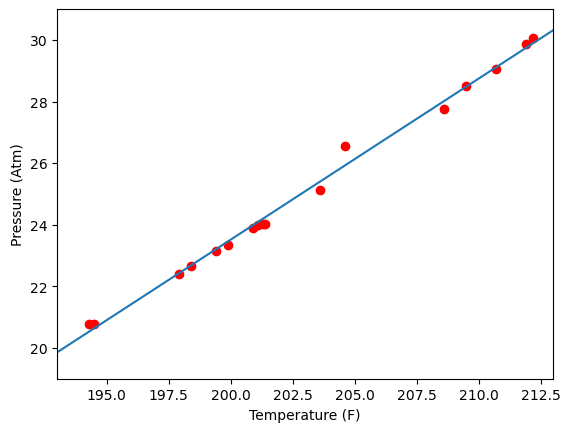

In [11]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
B = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), B)

print('w = ', w)

w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

Ví dụ 2.

In [12]:
import math
import numpy as np
with open('fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [13]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

        return Q.transpose(), R

def linear_regression(x_data, y_data):
    # """

    # This function calculate linear regression base on x_data and y_data
    # :param x_data: vector
    # :param y_data: vector
    # :return: w (regression estimate)
    # """

    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [14]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457733883
                 Tax: -4.227983208329593
                Dlic: 0.47187121344197713
              Income: -0.006135330970417591
            LogMiles: 18.545274506048038


b) Trường hợp sử dụng thư viện Scikit-Learn

In [15]:
from sklearn import datasets, linear_model
# Load training data here and assign to Xbar (obs. Data) and y (label)
x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)
# fit_intercept = False for calculating the bias
regr.fit(x_bars, y_data)

LinearRegression(fit_intercept=False)